In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
data = pd.read_csv("housing.csv", sep= ",")

In [143]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [147]:
#there is drop in total_bedrooms data by 200 data points
data.dropna(inplace = True)

In [149]:
data.info() #now those dataset are removed where total_bedrooms weren't defined

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [151]:
from sklearn.model_selection import train_test_split

In [153]:
X= data.drop(['median_house_value'], axis=1) #whole data except the column we wanna predict
Y= data['median_house_value']

In [155]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [157]:
Y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [203]:
X_train, X_test , Y_train , Y_test = train_test_split(X,Y, test_size=0.2)

In [205]:
train_data =X_train

In [207]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5820,-118.25,34.12,21.0,739.0,265.0,861.0,246.0,2.4856,<1H OCEAN
13303,-117.62,34.08,30.0,1372.0,235.0,1047.0,225.0,3.1597,INLAND
11440,-117.97,33.73,18.0,3698.0,574.0,2046.0,614.0,6.2984,<1H OCEAN
3674,-118.39,34.22,35.0,1790.0,334.0,1277.0,345.0,5.0818,<1H OCEAN
1081,-121.84,39.73,52.0,502.0,100.0,311.0,100.0,1.5481,INLAND
...,...,...,...,...,...,...,...,...,...
11150,-117.97,33.84,34.0,874.0,153.0,549.0,153.0,4.8667,<1H OCEAN
44,-122.26,37.83,52.0,1443.0,311.0,660.0,292.0,3.0125,NEAR BAY
4002,-118.66,34.18,25.0,6612.0,857.0,2519.0,843.0,8.3912,<1H OCEAN
7963,-118.19,33.86,42.0,1999.0,431.0,1060.0,399.0,3.7031,<1H OCEAN


In [209]:
train_data=train_data.join(Y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

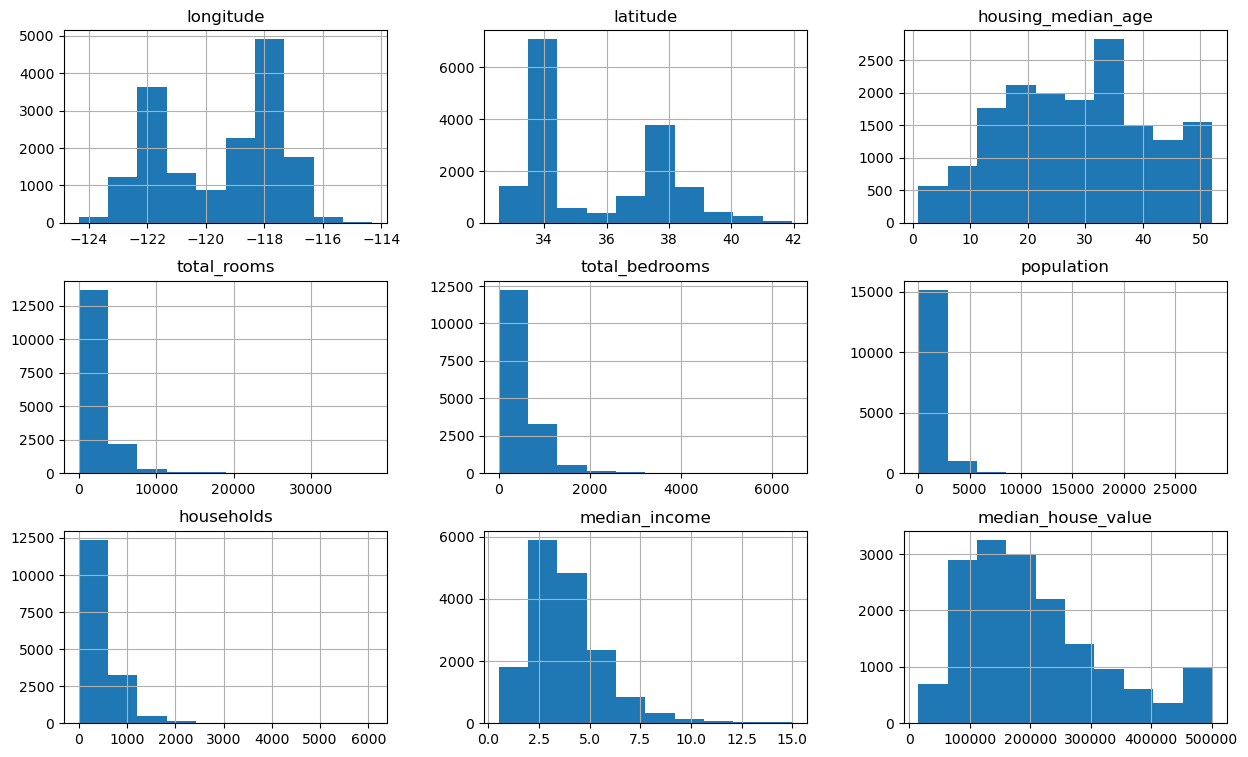

In [211]:
train_data.hist(figsize=(15,9))

<Axes: >

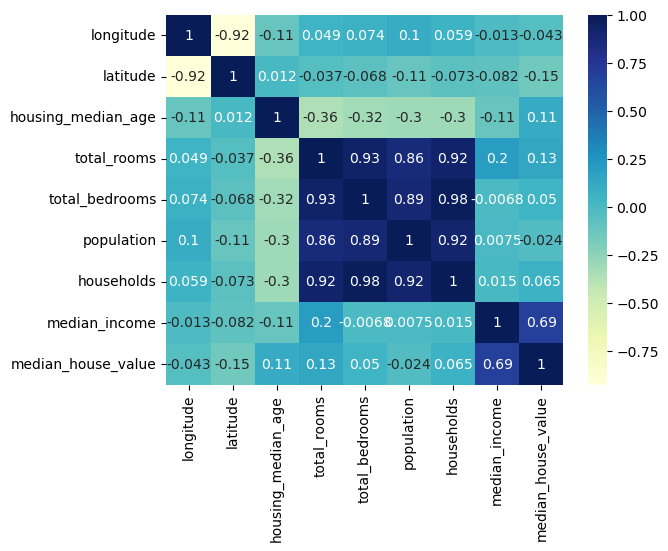

In [212]:
train_data_numeric = train_data.select_dtypes(include='number')
train_data_numeric.corr()
sns.heatmap(train_data_numeric.corr(), annot=True, cmap="YlGnBu")


In [213]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

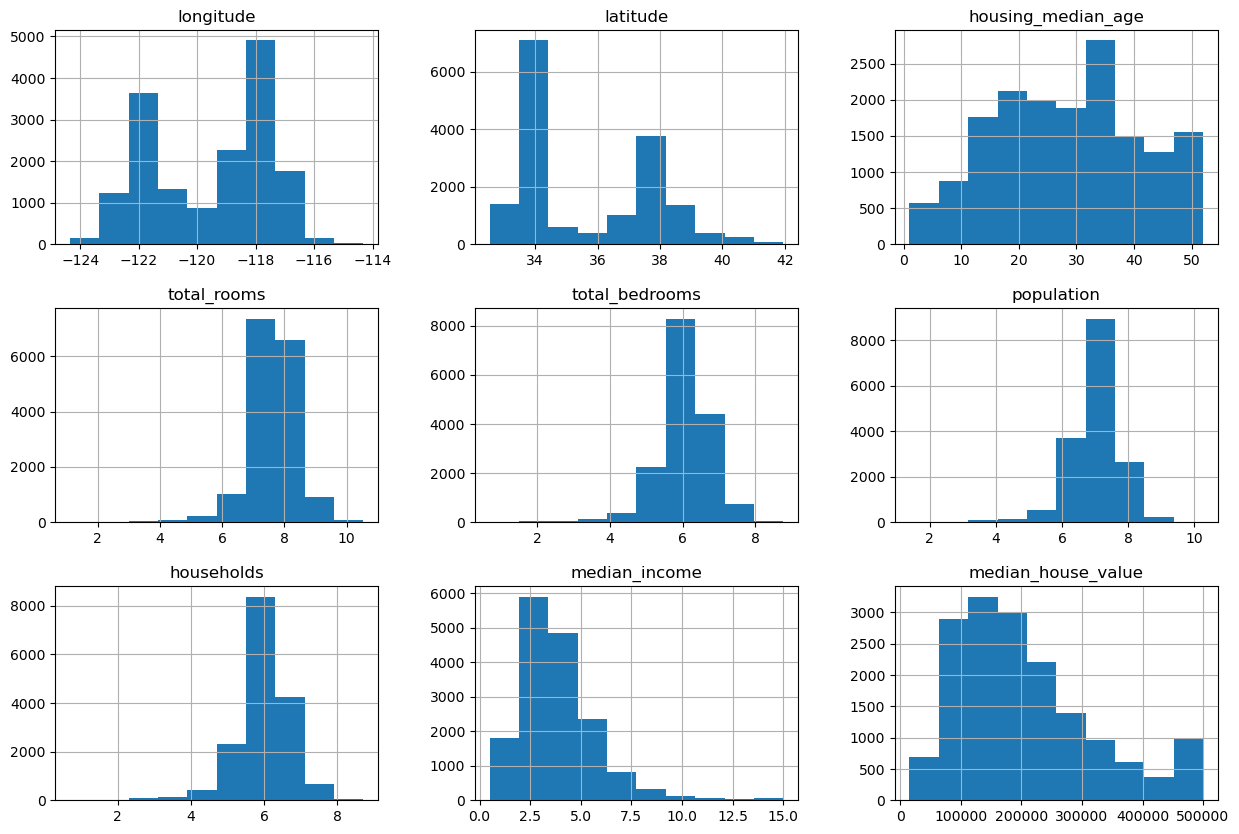

In [214]:
train_data.hist(figsize=(15,10))

In [216]:
train_data = train_data.drop('ocean_proximity', axis=1).join(
    pd.get_dummies(train_data['ocean_proximity']).astype(int)
)


In [217]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
5820,-118.25,34.12,21.0,6.606650,5.583496,6.759255,5.509388,2.4856,181300.0,1,0,0,0,0
13303,-117.62,34.08,30.0,7.224753,5.463832,6.954639,5.420535,3.1597,116300.0,0,1,0,0,0
11440,-117.97,33.73,18.0,8.215818,6.354370,7.624131,6.421622,6.2984,269800.0,1,0,0,0,0
3674,-118.39,34.22,35.0,7.490529,5.814131,7.153052,5.846439,5.0818,186800.0,1,0,0,0,0
1081,-121.84,39.73,52.0,6.220590,4.615121,5.743003,4.615121,1.5481,200000.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11150,-117.97,33.84,34.0,6.774224,5.036953,6.309918,5.036953,4.8667,186800.0,1,0,0,0,0
44,-122.26,37.83,52.0,7.275172,5.743003,6.493754,5.680173,3.0125,184400.0,0,0,0,1,0
4002,-118.66,34.18,25.0,8.796793,6.754604,7.832014,6.738152,8.3912,419000.0,1,0,0,0,0
7963,-118.19,33.86,42.0,7.600902,6.068426,6.966967,5.991465,3.7031,167100.0,1,0,0,0,0


<Axes: >

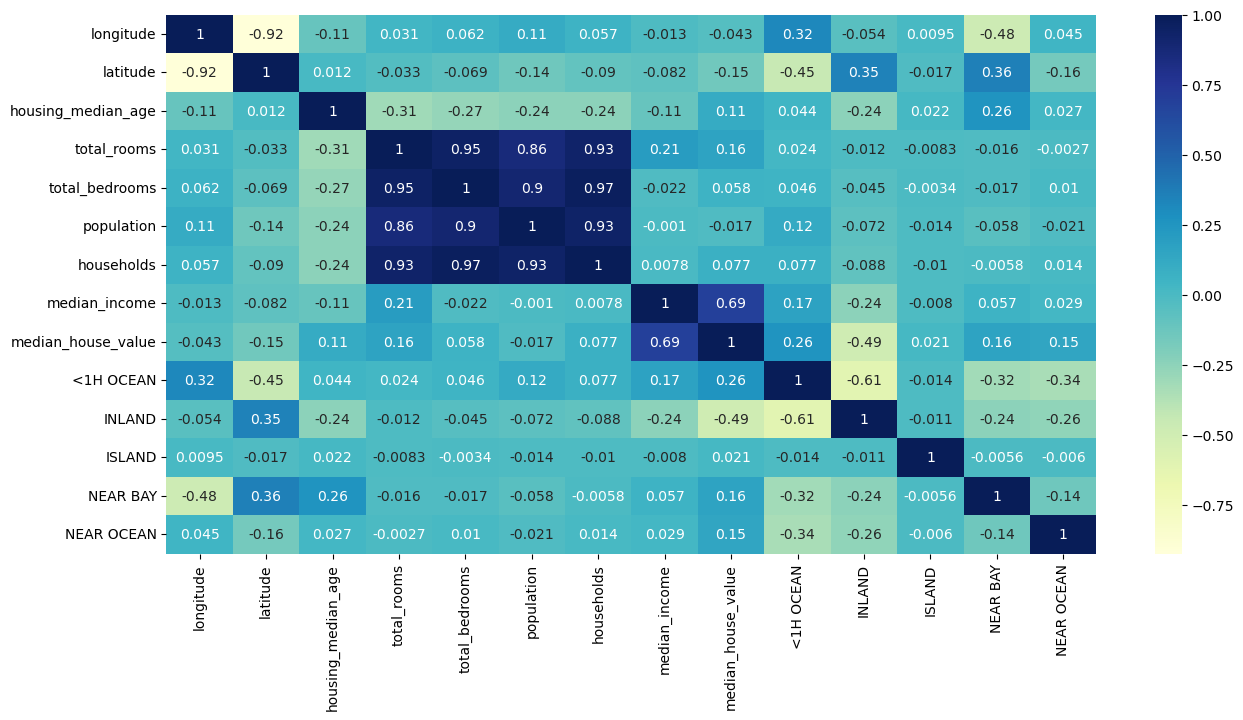

In [220]:
plt.figure(figsize=(15,7))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

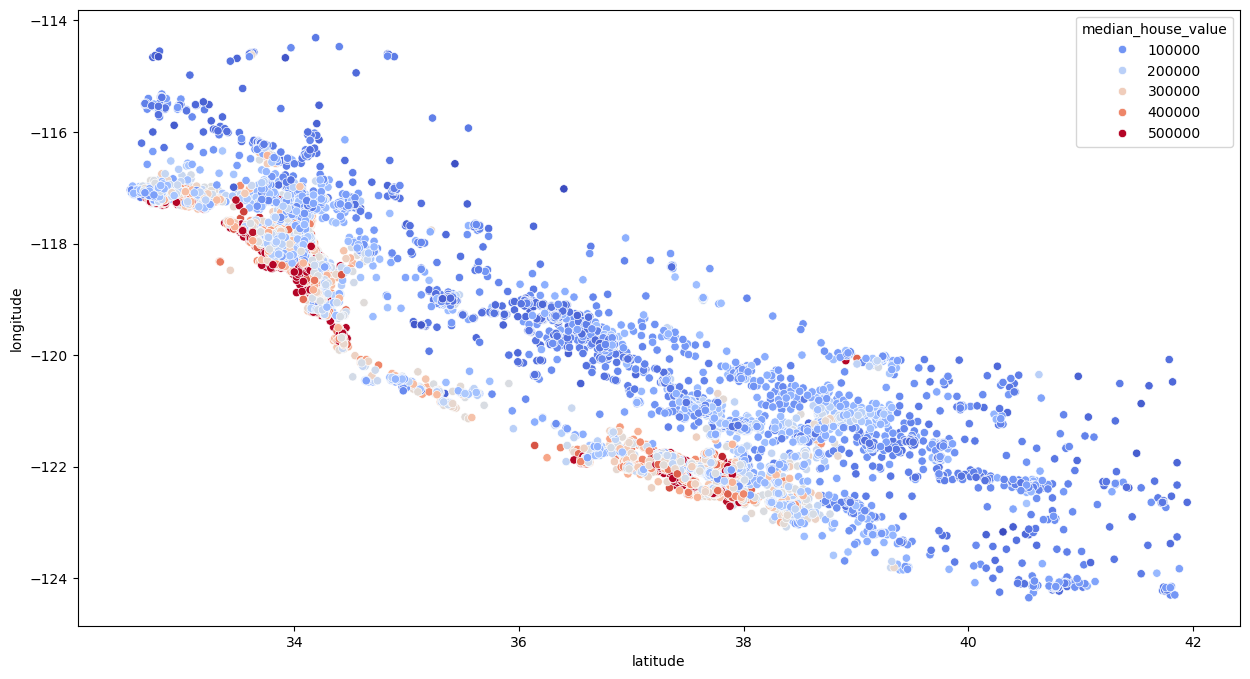

In [221]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data = train_data, hue = "median_house_value", palette="coolwarm")
#we get to know that closer the house is to the coast more expensive it gets...

In [269]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_train, Y_train = train_data.drop(['median_house_value'],axis=1), train_data['median_house_value']

reg=LinearRegression()
reg.fit(X_train_s,Y_train)


LinearRegression()

In [243]:
test_data= X_test.join(Y_test)
test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)
test_data = test_data.drop('ocean_proximity', axis=1).join( pd.get_dummies(test_data['ocean_proximity']).astype(int))

KeyError: "['ocean_proximity'] not found in axis"

In [245]:
X_test, Y_test = test_data.drop(['median_house_value'],axis=1), test_data['median_house_value']

In [249]:
X_test_s=scaler.transform(X_test)

In [251]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
5799,-118.24,34.13,45.0,2.161361,1.945403,2.073274,1.942889,5.6921,1,0,0,0,0,269000.0
1900,-120.00,38.90,21.0,2.129535,1.951644,2.028667,1.907071,1.9727,0,1,0,0,0,114100.0
12239,-116.93,33.73,13.0,2.218094,1.995058,2.128886,1.980464,4.0433,0,1,0,0,0,132300.0
4011,-118.59,34.17,36.0,2.145144,1.929505,2.032867,1.916789,5.4847,1,0,0,0,0,296000.0
18156,-122.06,37.36,35.0,2.185914,1.974433,2.104549,1.963258,6.0777,1,0,0,0,0,327500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10473,-117.73,33.51,5.0,2.243141,2.037086,2.094584,2.008277,6.1785,1,0,0,0,0,295900.0
9524,-123.17,39.18,14.0,2.165009,1.915895,2.071697,1.907071,5.9585,1,0,0,0,0,214900.0
3964,-118.58,34.20,21.0,2.197189,2.029908,2.141164,2.020359,3.5000,1,0,0,0,0,223700.0
19329,-122.88,38.46,25.0,2.122860,1.909924,2.028667,1.905622,2.5687,1,0,0,0,0,249200.0


In [271]:
reg.score(X_test_s,Y_test)

-0.3496150863157961

In [298]:
# Apply get_dummies to both datasets BEFORE splitting
X = pd.get_dummies(X, dtype=int)  # this will encode 'ocean_proximity'


In [300]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [302]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)


In [304]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train_s, Y_train)


LinearRegression()

In [306]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = reg.predict(X_test_s)

mae = mean_absolute_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)
r2 = r2_score(Y_test, y_pred)
mape = np.mean(np.abs((Y_test - y_pred) / Y_test)) * 100
accuracy = 100 - mape

print(f"Test MAE: {mae:.2f}")
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R² Score: {r2:.4f}")
print(f"Test MAPE: {mape:.2f}%")
print(f"Test Accuracy (100 - MAPE): {accuracy:.2f}%")


Test MAE: 50997.36
Test RMSE: 71003.26
Test R² Score: 0.6384
Test MAPE: 28.47%
Test Accuracy (100 - MAPE): 71.53%


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


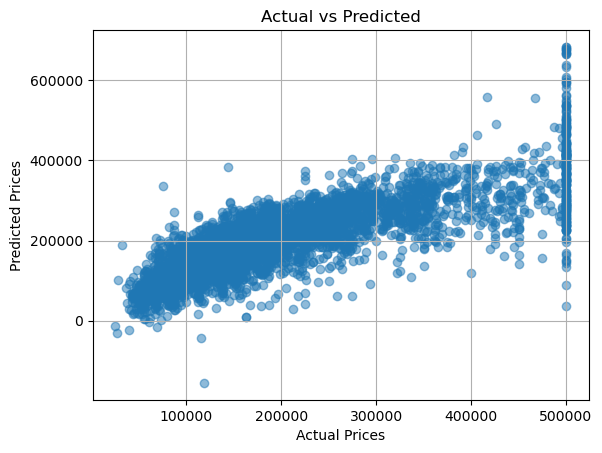

In [308]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()


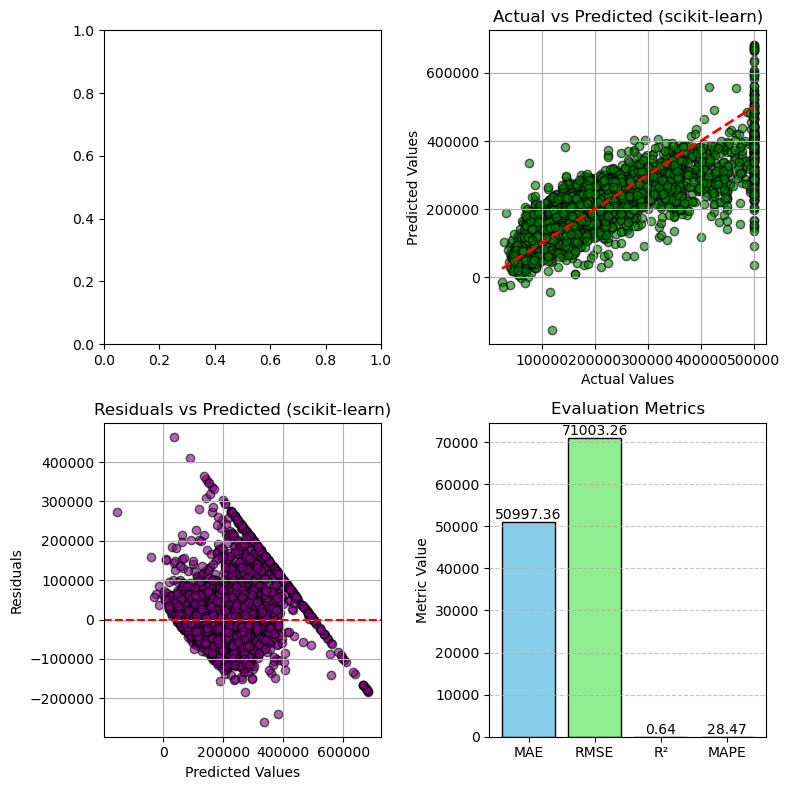

In [339]:
import matplotlib.pyplot as plt
import numpy as np

# Compute residuals
residuals = Y_test - y_pred

# Create 4 subplots
fig, axs = plt.subplots(2,2, figsize=(8, 8))
axs = axs.flatten()


# 1. Top-right: Actual vs Predicted
axs[1].scatter(Y_test, y_pred, alpha=0.6, color='green', edgecolors='k')
axs[1].plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
axs[1].set_xlabel("Actual Values")
axs[1].set_ylabel("Predicted Values")
axs[1].set_title("Actual vs Predicted (scikit-learn)")
axs[1].grid(True)

# 2. Bottom-left: Residuals
axs[2].scatter(y_pred, residuals, alpha=0.6, color='purple', edgecolors='k')
axs[2].axhline(y=0, color='red', linestyle='--')
axs[2].set_xlabel("Predicted Values")
axs[2].set_ylabel("Residuals")
axs[2].set_title("Residuals vs Predicted (scikit-learn)")
axs[2].grid(True)

# 3. Bottom-right: Evaluation Metrics Bar Plot
metrics = ["MAE", "RMSE", "R²", "MAPE"]
values = [mae, rmse, r2, mape]
bars = axs[3].bar(metrics, values, color=['skyblue', 'lightgreen', 'orange', 'salmon'], edgecolor='black')
axs[3].set_title("Evaluation Metrics")
axs[3].set_ylabel("Metric Value")
axs[3].grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    axs[3].text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
